In [95]:
import pandas as pd
import numpy as np
import pymc3 as pm
import theano.tensor as tt
import scipy as sp
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline

In [115]:
# Mann-Whitney rank test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html

# throughtput

In [96]:
throughput = pd.read_pickle("i915_throughput.pkl")
count_data = throughput.top2_count
n_count_data = count_data.size

In [100]:
sp.stats.mannwhitneyu(count_data[:32], count_data[36:], alternative='greater')

MannwhitneyuResult(statistic=475.5, pvalue=7.8367310232630265e-05)

In [71]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4548.21it/s]


In [72]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

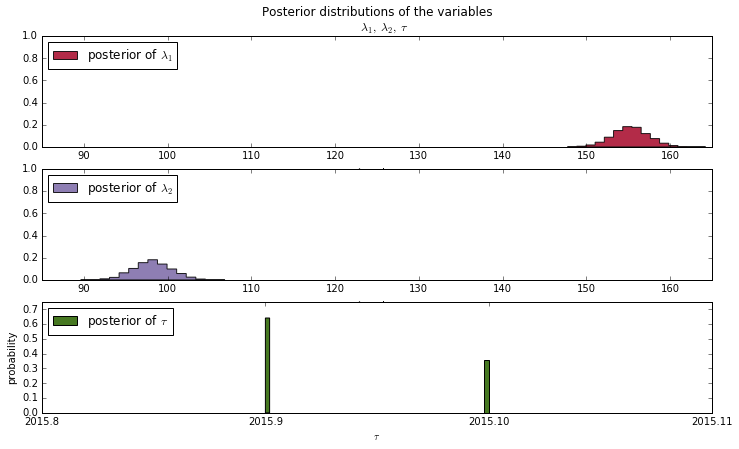

In [78]:
#figsize(12.5, 10)
#histogram of the samples:

plt.figure(figsize=(12, 6.75), facecolor="white")

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([85, 165])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([85, 165])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.' + str(t[1])))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([31, 34])
plt.xlabel(r"$\tau$ ")
plt.ylabel("probability");

In [9]:
count_data.index[33]

(2015, 10)

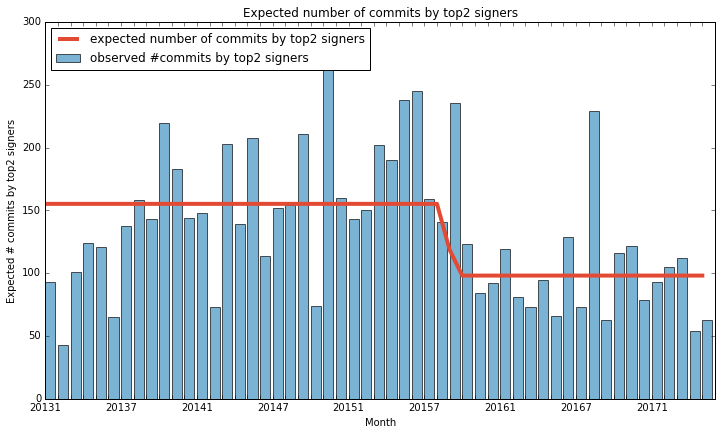

In [76]:

plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of commits by top2 signers")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected # commits by top2 signers")
plt.title("Expected number of commits by top2 signers")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed #commits by top2 signers")

plt.legend(loc="upper left");

# Max author count

In [101]:
author = pd.read_pickle("i915_author.pickle")
count_data = author['max']
n_count_data = count_data.size

In [102]:
sp.stats.mannwhitneyu(count_data[:32], count_data[36:], alternative='greater')

MannwhitneyuResult(statistic=477.0, pvalue=8.4315219421578809e-06)

In [101]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4898.76it/s]


In [102]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

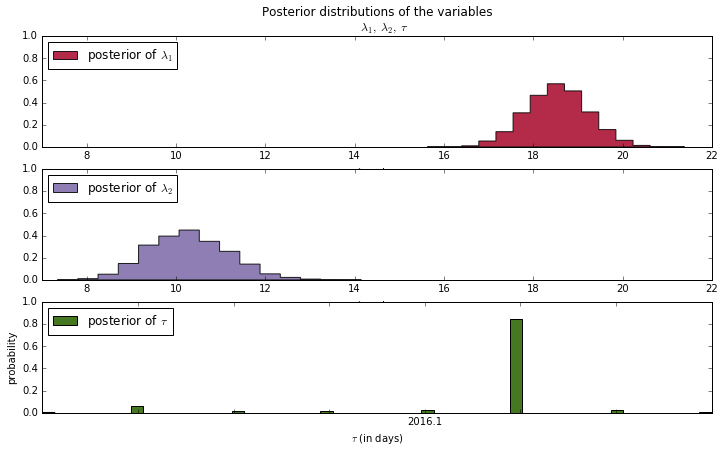

In [106]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([7.0, 22.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([7.0, 22.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))


plt.legend(loc="upper left")
plt.ylim([0, 1.0])
plt.xlim([32, 39])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

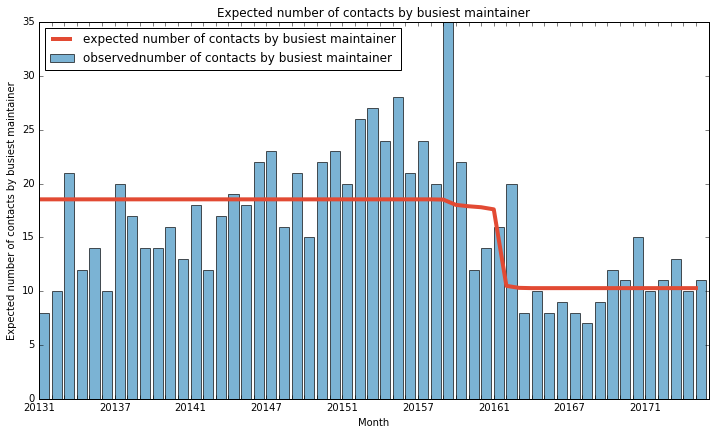

In [104]:
plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of contacts by busiest maintainer")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected number of contacts by busiest maintainer")
plt.title("Expected number of contacts by busiest maintainer")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observednumber of contacts by busiest maintainer")

plt.legend(loc="upper left");

# Max files count

In [103]:
author = pd.read_pickle("i915_files.pickle")
count_data = author['max']
n_count_data = count_data.size

In [106]:
print sp.stats.mannwhitneyu(count_data[:32], count_data[36:], alternative='less')
print sp.stats.mannwhitneyu(count_data[:32], count_data[36:], alternative='greater')
print sp.stats.mannwhitneyu(count_data[:32], count_data[36:], alternative=None)

MannwhitneyuResult(statistic=200.0, pvalue=0.066455540592230314)
MannwhitneyuResult(statistic=200.0, pvalue=0.93621288580670892)
MannwhitneyuResult(statistic=200.0, pvalue=0.066455540592230314)


In [118]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4881.22it/s]


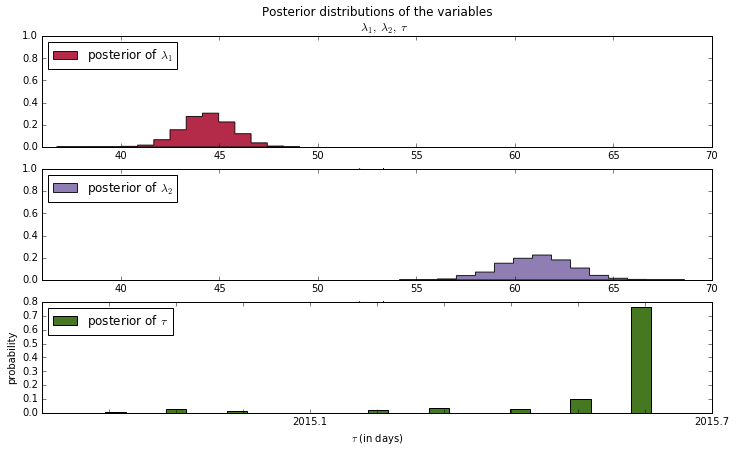

In [123]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([36.0, 70.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([36.0, 70.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))


plt.legend(loc="upper left")
#plt.ylim([0, .4])
plt.xlim([20, 30])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

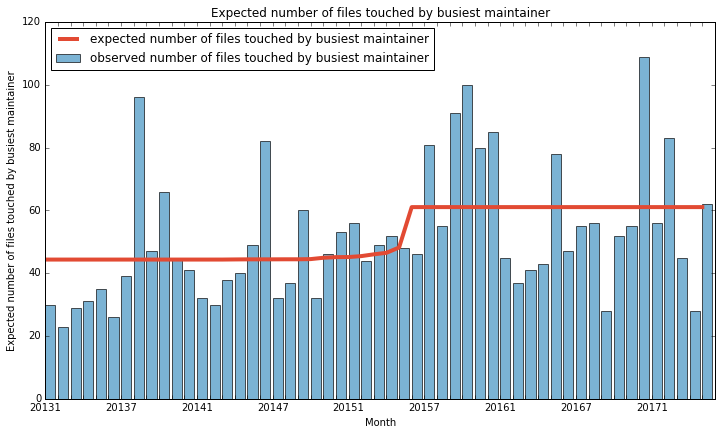

In [124]:
plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of files touched by busiest maintainer")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected number of files touched by busiest maintainer")
plt.title("Expected number of files touched by busiest maintainer")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed number of files touched by busiest maintainer")

plt.legend(loc="upper left");

# active days

In [107]:
author = pd.read_pickle("i915_active_day.pickle")
count_data = author['count']
n_count_data = count_data.size

In [108]:
print sp.stats.mannwhitneyu(count_data[:32], count_data[36:], alternative='less')

MannwhitneyuResult(statistic=13.0, pvalue=2.626699416575294e-08)


In [80]:
with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)
    
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Poisson("obs", lambda_, observed=count_data)
    
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4625.35it/s]


In [83]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

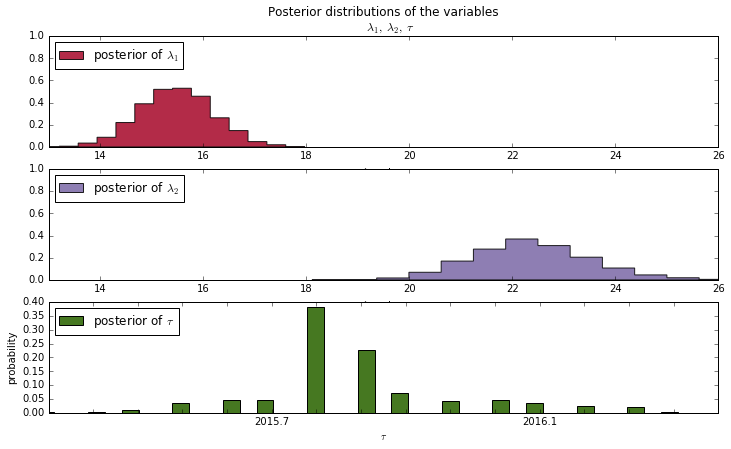

In [91]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([13.0, 26.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([13.0, 26.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))

plt.legend(loc="upper left")
plt.ylim([0, .4])
plt.xlim([25, 40])
plt.xlabel(r"$\tau$")
plt.ylabel("probability");

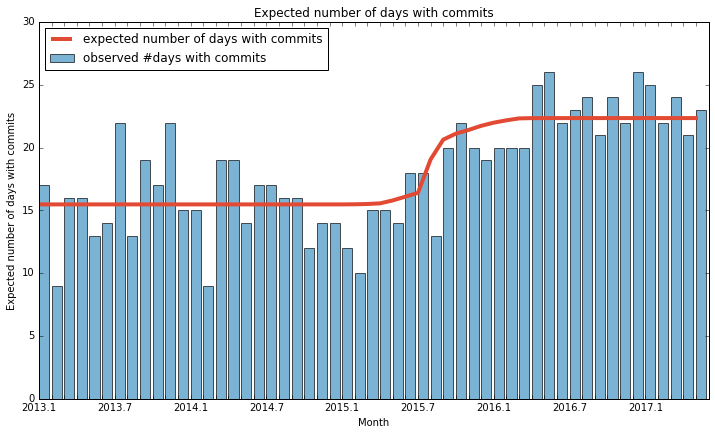

In [89]:
plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of days with commits")
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.' + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_count_data)
plt.xlabel("Month")
plt.ylabel("Expected number of days with commits")
plt.title("Expected number of days with commits")
#plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed #days with commits")

plt.legend(loc="upper left");

# pressure

In [111]:
pressure = pd.read_pickle("i915_pressure.pkl")

In [112]:
print sp.stats.mannwhitneyu(pressure[:32], pressure[36:], alternative='greater')

MannwhitneyuResult(statistic=446.0, pvalue=0.00072616305028959838)


In [113]:
throughput = pd.read_pickle("i915_throughput.pkl")
pressure = pd.read_pickle("i915_pressure_contiguous.pkl")

In [114]:
print sp.stats.mannwhitneyu(pressure[:32], pressure[36:], alternative='greater')

MannwhitneyuResult(statistic=475.0, pvalue=8.1817657984583817e-05)


In [92]:
throughput['total'].quantile([0.10])

0.1    110.0
Name: total, dtype: float64

In [93]:
throughput['total']

2013  1      96.0
      2      44.0
      3     104.0
      4     141.0
      5     124.0
      6      65.0
      7     146.0
      8     169.0
      9     156.0
      10    227.0
      11    196.0
      12    157.0
2014  1     150.0
      2      75.0
      3     212.0
      4     147.0
      5     220.0
      6     127.0
      7     186.0
      8     180.0
      9     234.0
      10     76.0
      11    279.0
      12    178.0
2015  1     160.0
      2     186.0
      3     222.0
      4     238.0
      5     271.0
      6     266.0
      7     168.0
      8     162.0
      9     261.0
      10    160.0
      11    234.0
      12    181.0
2016  1     202.0
      2     158.0
      3     214.0
      4     335.0
      5     218.0
      6     266.0
      7     222.0
      8     392.0
      9     177.0
      10    359.0
      11    308.0
      12    255.0
2017  1     279.0
      2     401.0
      3     424.0
      4     138.0
      5     195.0
      6     259.0
Name: total, dtype: float64

In [94]:
pressure

2013  1     0.418033
      2     0.232143
      3     0.403101
      4     0.359116
      5     0.244755
      6     0.270270
      7     0.311881
      8     0.205556
      9     0.380368
      10    0.346008
      11    0.342723
      12    0.289308
2014  1     0.333333
      2     0.164835
      3     0.203540
      4     0.320513
      5     0.266160
      6     0.311258
      7     0.336842
      8     0.145946
      9     0.041667
      10    0.021277
      11    0.375479
      12    0.211429
2015  1     0.280822
      2     0.170732
      3     0.327014
      4     0.199029
      5     0.101626
      6     0.108527
      7     0.287356
      8     0.239726
      9     0.119522
      10    0.123288
      11    0.038647
      12    0.111111
2016  1     0.120773
      2     0.110390
      3     0.045455
      4     0.082508
      5     0.062500
      6     0.090226
      7     0.253521
      8     0.347826
      9     0.067114
      10    0.134111
      11    0.149153
      12    0

In [83]:
data = pressure[throughput['total'] > 110]
n_data = len(data)

In [85]:
with pm.Model() as model:
    mu1 = pm.Uniform("mu1", lower=0, upper=1)
    var1 = pm.Uniform("var1", lower=0, upper=mu1 * (1-mu1))
    mu2 = pm.Uniform("mu2", lower=0, upper=1)
    var2 = pm.Uniform("va2", lower=0, upper=mu2 * (1-mu2))
      
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)
    idx = np.arange(n_data) # Index
    
    mu = pm.math.switch(tau >= idx, mu1, mu2)
    var = pm.math.switch(tau >= idx, var1, var2)
    
    sd = pm.math.sqrt(var)
    observation = pm.Beta("obs", mu=mu, sd=sd, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)
    
    
mu_1_samples = trace['mu1']
mu_2_samples = trace['mu2']
tau_samples = trace['tau']

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:08<00:00, 1856.90it/s]


In [86]:
mu_1_samples

array([ 0.2863925 ,  0.2863925 ,  0.29596478, ...,  0.29269234,
        0.30455082,  0.30455082])

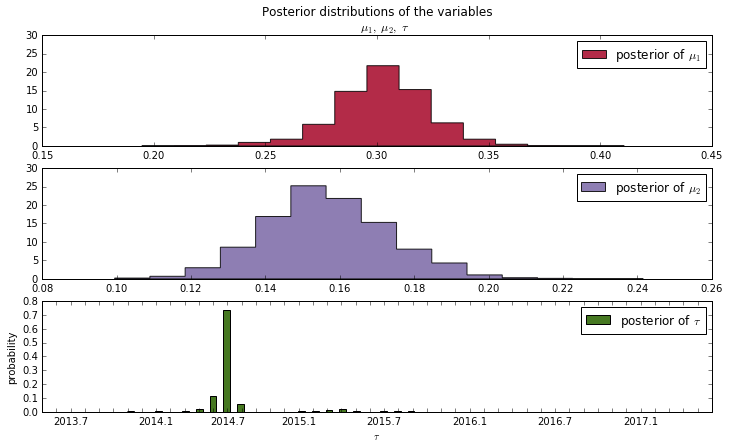

In [88]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(mu_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\mu_1$", color="#A60628", normed=True)
plt.legend(loc="upper right")
plt.title(r"""Posterior distributions of the variables
    $\mu_1,\;\mu_2,\;\tau$""")
#plt.xlim([0.00, 0.20])
plt.ylim([0.0,30.0])
plt.xlabel("$\mu_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(mu_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\mu_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper right")
#plt.xlim([0.00, 0.20])
plt.ylim([0.0,30.0])
plt.xlabel("$\mu_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_data), data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if t[1] % 6 == 1 else ""))
#plt.xlim([15, 32])


plt.legend(loc="upper right")
#plt.ylim([0, .4])
plt.xlabel(r"$\tau$ ")
plt.ylabel("probability");

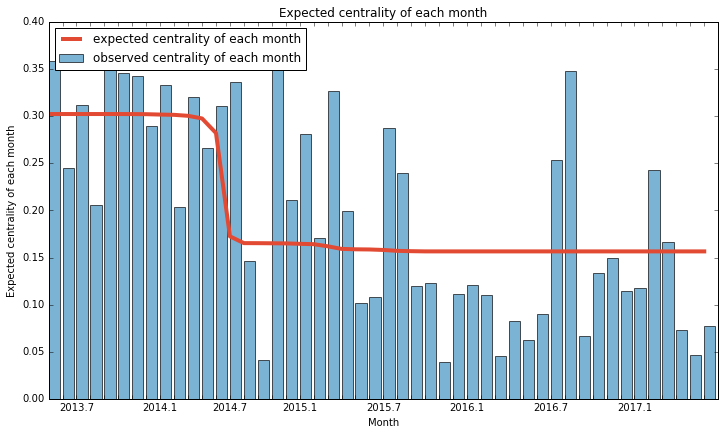

In [89]:

plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_centrality = np.zeros(n_data)
for day in range(0, n_data):

    ix = day < tau_samples

    expected_centrality[day] = (mu_1_samples[ix].sum()
                                   + mu_2_samples[~ix].sum()) / N


plt.plot(range(n_data), expected_centrality, lw=4, color="#E24A33",
         label="expected centrality of each month")
plt.xticks(range(n_data), data.index.map(lambda t: str(t[0]) + '.' + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_data)
plt.xlabel("Month")
plt.ylabel("Expected centrality of each month")
plt.title("Expected centrality of each month")
#plt.ylim(0, 60)
plt.bar(np.arange(len(data)), data, color="#348ABD", alpha=0.65,
        label="observed centrality of each month")

plt.legend(loc="upper left");

# Latency

In [142]:
latency = pd.read_pickle("i915_latency.pkl")

In [143]:
print sp.stats.mannwhitneyu(latency['mean'][:32], latency['mean'][36:], alternative='greater')

MannwhitneyuResult(statistic=447.0, pvalue=0.00067886052075754764)


In [144]:
print sp.stats.mannwhitneyu(latency['50%'][:32], latency['50%'][36:], alternative='greater')

MannwhitneyuResult(statistic=543.0, pvalue=1.3463501437459782e-07)


In [145]:
data = latency['mean'].map(lambda t: t.delta / (86400 * 1e9))
n_data = len(data)

In [146]:
with pm.Model() as model:
    
    lambda_1 = pm.Gamma("lambda_1", alpha=1, beta=1)
    lambda_2 = pm.Gamma("lambda_2", alpha=1, beta=1)
      
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)
    idx = np.arange(n_data) # Index
    
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Exponential("obs", lam=lambda_, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(100000, tune=50000,step=step, njobs=1)
    
    
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

100%|████████████████████████████████████████████████████████████████████████| 150000/150000 [00:31<00:00, 4788.05it/s]


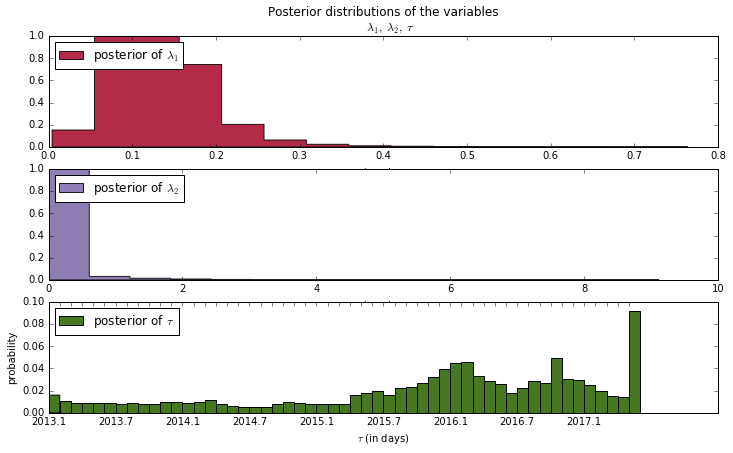

In [147]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
#plt.xlim([7.0, 22.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
#plt.xlim([7.0, 22.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) if (t[1]%6 == 1) else ""))


plt.legend(loc="upper left")
#plt.ylim([0, 1.0])
#plt.xlim([32, 39])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

In [149]:
data = latency['50%'].map(lambda t: t.delta / (86400 * 1e9))
n_data = len(data)

with pm.Model() as model:
    
    lambda_1 = pm.Gamma("lambda_1", alpha=1, beta=1)
    lambda_2 = pm.Gamma("lambda_2", alpha=1, beta=1)
      
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_data - 1)
    idx = np.arange(n_data) # Index
    
    lambda_ = pm.math.switch(tau >= idx, lambda_1, lambda_2)
    
    observation = pm.Exponential("obs", lam=lambda_, observed=data)
    
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step, njobs=1)
    
    
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

100%|██████████████████████████████████████████████████████████████████████████| 15000/15000 [00:03<00:00, 4508.57it/s]


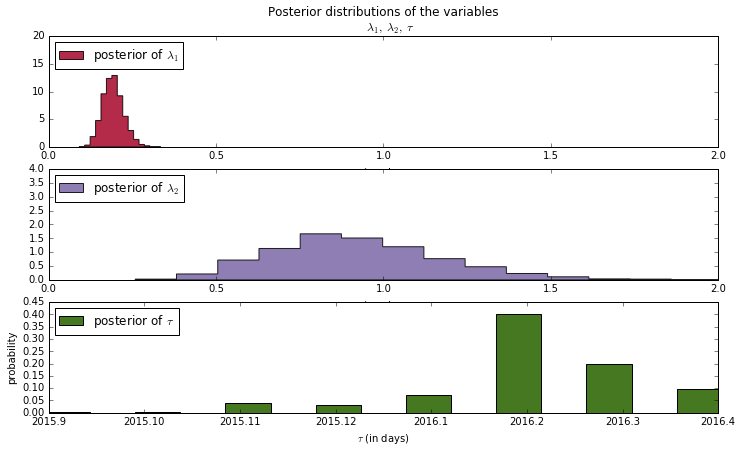

In [150]:
plt.figure(figsize=(12, 6.75), facecolor="white")
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", normed=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([0.0, 2.0])
plt.ylim([0.0, 20.0])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=15, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", normed=True)
plt.legend(loc="upper left")
plt.xlim([0.0, 2.0])
plt.ylim([0.0, 4.0])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(range(n_count_data), count_data.index.map(lambda t: str(t[0]) + '.'+ str(t[1]) ))


plt.legend(loc="upper left")
#plt.ylim([0, 1.0])
plt.xlim([32, 39])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

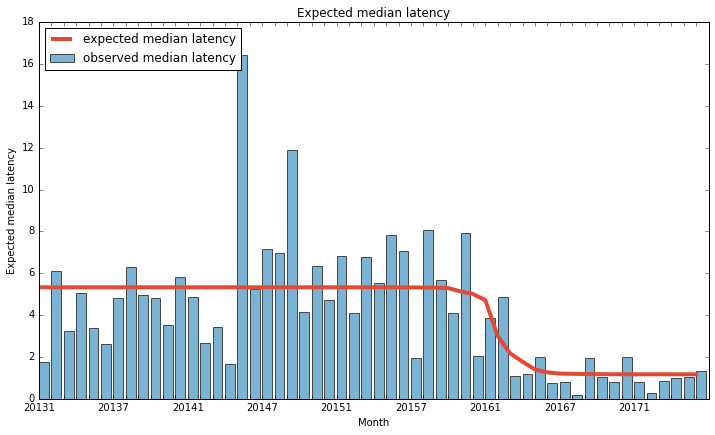

In [151]:

plt.figure(figsize=(12, 6.75), facecolor="white")

N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_data)
for day in range(0, n_data):

    ix = day < tau_samples

    expected_texts_per_day[day] = ((1/lambda_1_samples[ix]).sum()
                                   + (1/lambda_2_samples[~ix]).sum()) / N


plt.plot(range(n_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected median latency")
plt.xticks(range(n_data), data.index.map(lambda t: str(t[0]) + str(t[1]) if (t[1]%6 == 1) else ""))
plt.xlim(0, n_data)
plt.xlabel("Month")
plt.ylabel("Expected median latency")
plt.title("Expected median latency")
#plt.ylim(0, 60)
plt.bar(np.arange(len(data)), data, color="#348ABD", alpha=0.65,
        label="observed median latency")

plt.legend(loc="upper left");